In [17]:
import scipy.io
import numpy as np
from sklearn import manifold, datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
from matplotlib.pyplot import scatter
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
silhouette = scipy.io.loadmat('silhouette.mat')
data = silhouette['X']
labels = silhouette['Y'].transpose().ravel()

In [3]:
print(np.shape(data))
print(np.shape(labels))

(8671, 784)
(8671,)


In [4]:
clf = SVC()
start1 = time.time()
model = clf.fit(data, labels)
stop1 = time.time()
score = model.score(data,labels)

print('SVM on the origninal space took {:0.2f} seconds to perform a train accuracy of {:0.2f}%' .format((stop1-start1), 100*score))

SVM on the origninal space took 54.67 seconds to perform a train accuracy of 0.64%


In [7]:
n_neighbors = 50
n_components = 3
method = 'standard'

embed = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                                 eigen_solver='auto',
                                                 method=method)

projected = embed.fit_transform(data)

start2 = time.time()
model = clf.fit(projected, labels)
stop2 = time.time()
score = model.score(projected,labels)
print('SVM on the embedded {}D space took {:0.2f} seconds to perform a train accuracy of {:0.2f}%' .format(n_components,(stop2-start2), score))

SVM on the embedded 3D space took 2.48 seconds to perform a train accuracy of 0.16%


In [ ]:
print('Time gain is {}'.format((stop1-start1)/(stop2-start2)))

<IPython.core.display.Javascript object>


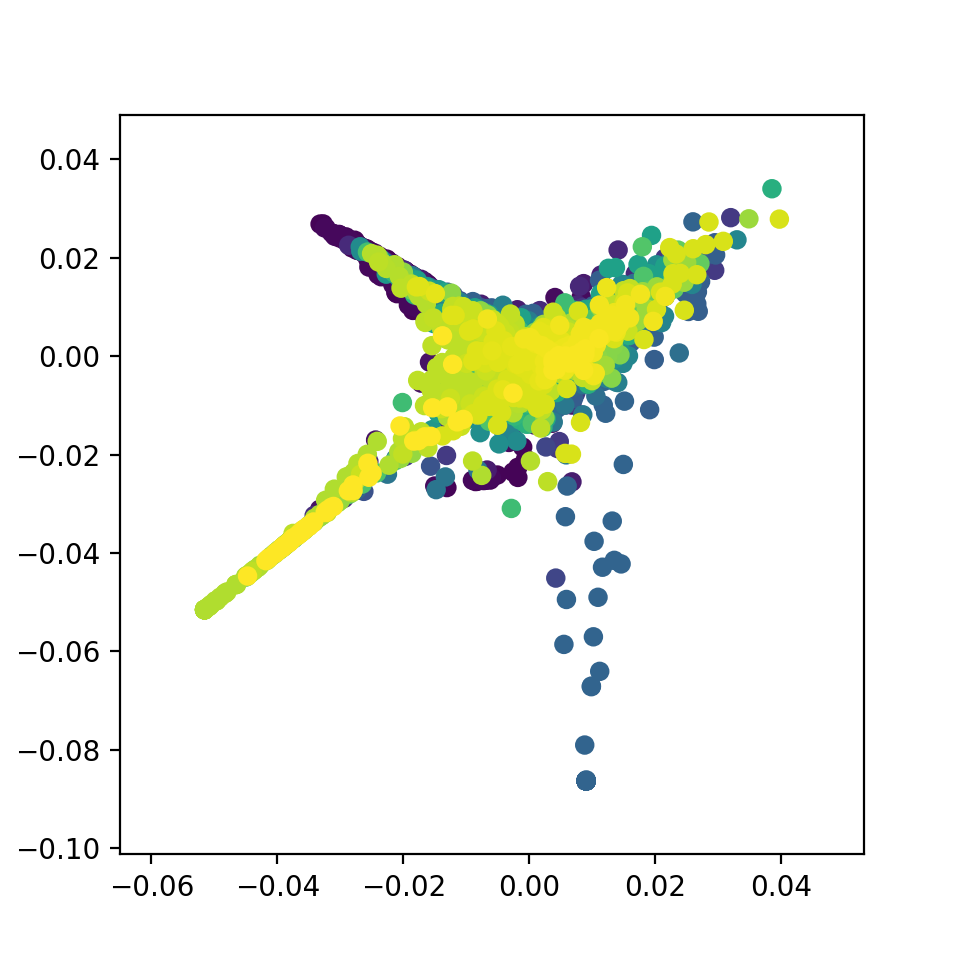

In [21]:
fig = plt.figure(figsize = plt.figaspect(1))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(projected[:,0], projected[:,1], c=labels)
plt.savefig('resulthighD.eps', format='eps')